<div class="alert alert-block alert-success">
    <b><center>RECURRENT NEURAL NETWORK</center></b>
    <b><center>RNN 기본 모델들</center></b>
</div>

# Configure Learning Environment

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)
%matplotlib widget

In [3]:
import os, math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers, backend, utils

In [4]:
print("GPU ", "사용 가능" if tf.test.is_gpu_available() else "사용 불가능")

GPU  사용 가능


# Prepare Data

In [5]:
data = np.array([
    [[1.], [2.], [3.]],
    [[2.], [3.], [4.]],
    [[3.], [4.], [5.]]
])
label = np.array([
    [6.], [7.], [8.]
])
data.shape, label.shape

((3, 3, 1), (3, 1))

# Single-Layered / Unidirectional & Many-To-One

* Input Data : ( batch size, time_step, input_dim(feature size) )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


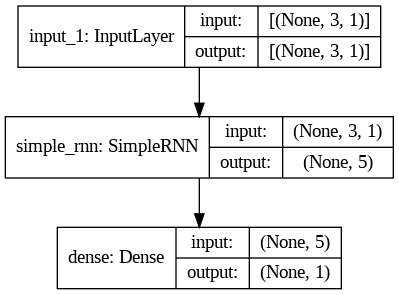

In [6]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [7]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [8]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [9]:
model.predict(data[0:1])

array([[5.96787]], dtype=float32)

In [10]:
model.predict(data)

array([[5.9678698],
       [7.2580695],
       [7.512941 ]], dtype=float32)

# Single-Layered / Unidirectional & Many-To-Many

## return_sequences

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
dense_1 (Dense)              (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


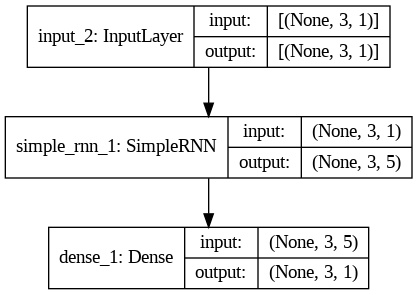

In [11]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [12]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [13]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [14]:
model.predict(data[0:1])

array([[[6.361361],
        [7.113179],
        [7.125363]]], dtype=float32)

In [15]:
model.predict(data)

array([[[6.361361 ],
        [7.113179 ],
        [7.125363 ]],

       [[6.8313007],
        [7.125515 ],
        [7.1281066]],

       [[6.9851637],
        [7.12819  ],
        [7.129048 ]]], dtype=float32)

## TimeDistributed

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


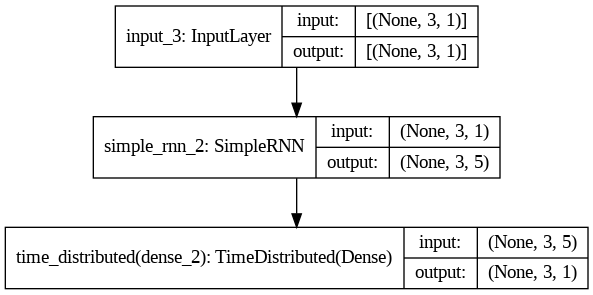

In [16]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [17]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [18]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [19]:
model.predict(data[0:1])

array([[[6.272444 ],
        [5.98727  ],
        [6.2205977]]], dtype=float32)

In [20]:
model.predict(data)

array([[[6.272444 ],
        [5.98727  ],
        [6.2205977]],

       [[7.216943 ],
        [6.8370714],
        [7.248336 ]],

       [[7.457579 ],
        [7.3814793],
        [7.5344534]]], dtype=float32)

## Using Backend

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
lambda (Lambda)              (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


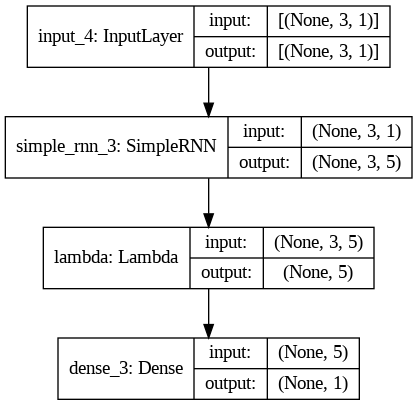

In [21]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: backend.mean(x, axis=1)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [22]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [23]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [24]:
model.predict(data[0:1])

array([[5.924938]], dtype=float32)

In [25]:
model.predict(data)

array([[5.924938 ],
       [7.1713014],
       [7.7973156]], dtype=float32)

## Using Lambda Function

In [26]:
@tf.function
def sequences_sum(x):
    return tf.reduce_mean(x, axis=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
lambda_1 (Lambda)            (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


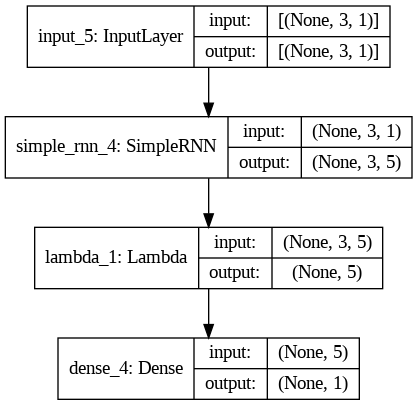

In [27]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: sequences_sum(x)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [28]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [29]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [30]:
model.predict(data[0:1])

array([[5.96387]], dtype=float32)

In [31]:
model.predict(data)

array([[5.96387  ],
       [7.1596575],
       [7.6764793]], dtype=float32)

# Single-Layered / Bidirectional & Many-To-One

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 10)                70        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


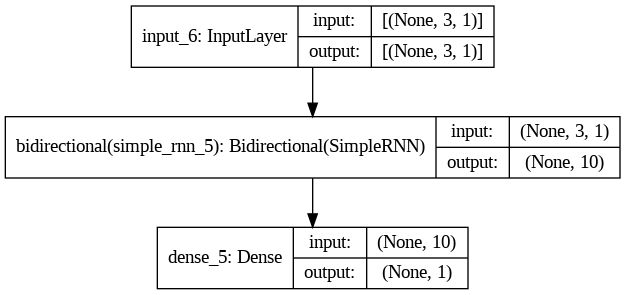

In [32]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [33]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [34]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [35]:
model.predict(data)

array([[5.993802 ],
       [7.0139837],
       [7.978934 ]], dtype=float32)

# Single-Layered / Bidirectional & Many-To-Many

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 1)              11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


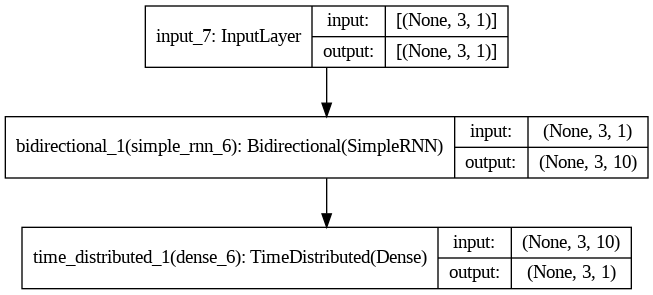

In [36]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [37]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [38]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [39]:
model.predict(data[0:1])

array([[[5.9495516],
        [5.983719 ],
        [5.9486675]]], dtype=float32)

In [40]:
model.predict(data)

array([[[5.9495516],
        [5.983719 ],
        [5.948668 ]],

       [[7.191079 ],
        [7.0667353],
        [7.1303496]],

       [[7.8730164],
        [7.88367  ],
        [7.888602 ]]], dtype=float32)

# Multi-Layered / Unidirectional & Many-To-One

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


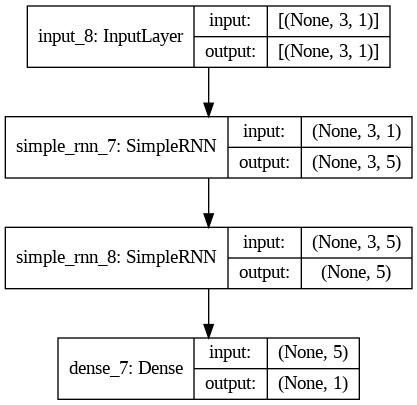

In [41]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [42]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [43]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [44]:
model.predict(data)

array([[6.997988 ],
       [6.9983697],
       [6.9984183]], dtype=float32)

# Multi-Layered / Bidirectional & Many-To-One

## Unidirectional > Bidirectional

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


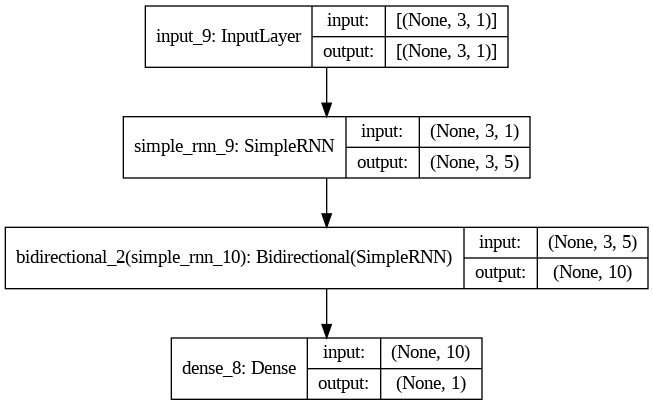

In [45]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [46]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [47]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [48]:
model.predict(data)

array([[5.926246 ],
       [7.1676188],
       [7.789625 ]], dtype=float32)

## Bidirectional > Bidirectional

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


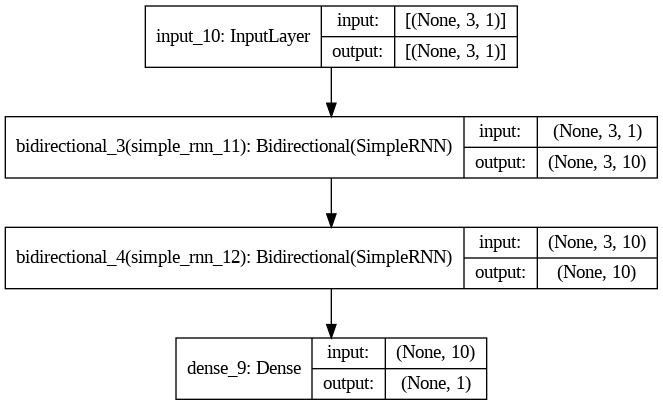

In [49]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [50]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [51]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [52]:
model.predict(data)

array([[5.999973],
       [7.000175],
       [7.999328]], dtype=float32)

# Multi-Layered / Bidirectional & Many-To-Many

## Unidirectional > Bidirectional

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
bidirectional_5 (Bidirection (None, 3, 10)             110       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 1)              11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


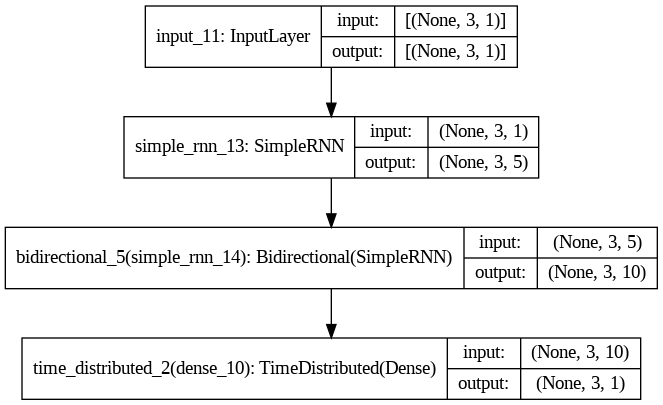

In [53]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [54]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [55]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [56]:
model.predict(data)

array([[[5.9459696],
        [6.024151 ],
        [6.120982 ]],

       [[7.066454 ],
        [6.893662 ],
        [7.013828 ]],

       [[7.9765897],
        [8.11769  ],
        [7.8066096]]], dtype=float32)

## Bidirectional > Bidirectional

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_7 (Bidirection (None, 3, 10)             160       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 1)              11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


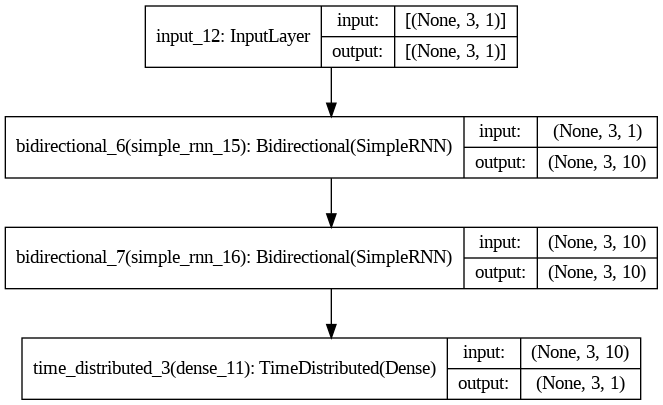

In [57]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [58]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [59]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [60]:
model.predict(data)

array([[[5.9968596],
        [5.999614 ],
        [5.9843044]],

       [[7.0093727],
        [7.0048275],
        [7.0301046]],

       [[7.991083 ],
        [7.9796743],
        [7.94162  ]]], dtype=float32)